In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.14.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

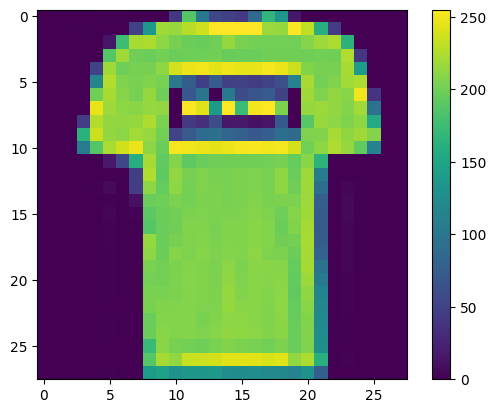

In [ ]:
plt.figure()

plt.imshow(train_images[1])

plt.colorbar()

plt.grid(False)

plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

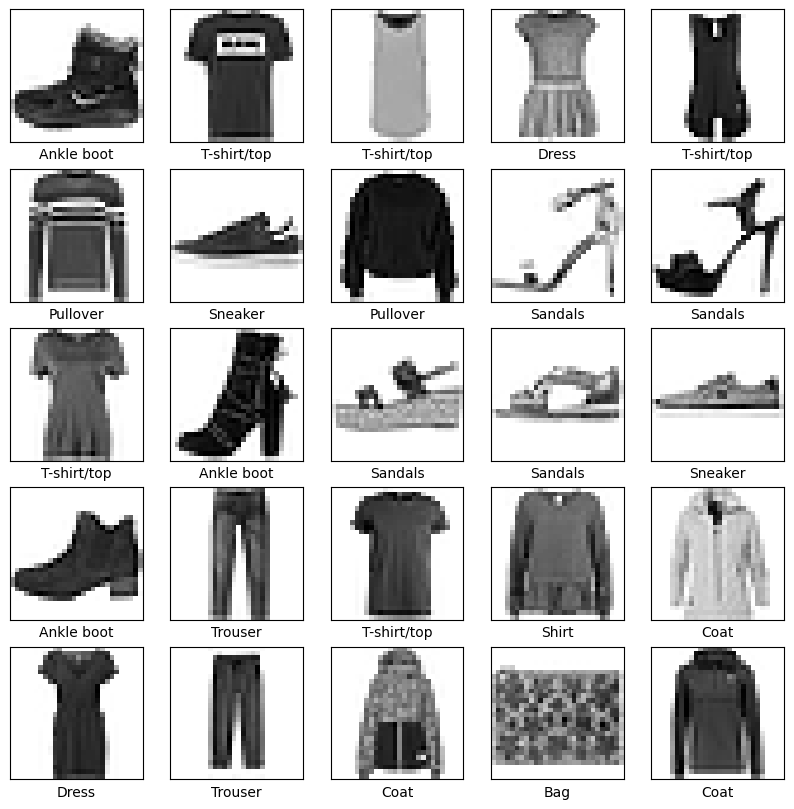

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4998 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3098 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2675 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2566 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2497 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\ntest accuracy : ", test_acc)

313/313 - 0s - loss: 0.3498 - accuracy: 0.8751 - 436ms/epoch - 1ms/step

test accuracy :  0.8751000165939331


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[0]

array([1.7371079e-08, 1.4109439e-09, 7.1903820e-08, 2.5227521e-08,
       2.0793601e-07, 7.5420742e-03, 5.8726105e-06, 1.7787002e-02,
       1.1536979e-06, 9.7466362e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

**ACTIVITY-2**

In [1]:
pip install pandas nltk spacy

*Read a CSV file containing text and perform following text preprocessing steps on the data.
• Tokenization
• Normalization
• Stemming
• Parts of speech (POS) tagging
• Lemmatization
• Stop words removal.
Show output after every step or create a separate file for each of the output generated.*

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from google.colab import files
from io import StringIO


In [8]:
uploaded = files.upload()

desired_file_name = 'lab7.csv'

csv_file_content = uploaded[desired_file_name]

Saving lab7.csv to lab7.csv


In [11]:


df = pd.read_csv(StringIO(csv_file_content.decode('utf-8')))

df['tokenized_text'] = df['text_column'].apply(lambda x: word_tokenize(x))
df.to_csv('tokenized_output.csv', index=False)

df['normalized_text'] = df['tokenized_text'].apply(lambda x: [word.lower() for word in x])
df.to_csv('normalized_output.csv', index=False)

stemmer = PorterStemmer()
df['stemmed_text'] = df['normalized_text'].apply(lambda x: [stemmer.stem(word) for word in x])
df.to_csv('stemmed_output.csv', index=False)

nlp = spacy.load('en_core_web_sm')
df['pos_tags'] = df['normalized_text'].apply(lambda x: [(token.text, token.pos_) for token in nlp(' '.join(x))])
df.to_csv('pos_tags_output.csv', index=False)

df['lemmatized_text'] = df['normalized_text'].apply(lambda x: [token.lemma_ for token in nlp(' '.join(x))])
df.to_csv('lemmatized_output.csv', index=False)

stop_words = set(stopwords.words('english'))
df['filtered_text'] = df['lemmatized_text'].apply(lambda x: [word for word in x if word not in stop_words])
df.to_csv('final_output.csv', index=False)

*Read the same file as in Q#4 and translate it into urdu by using Google Translator and save
translation in a new file named “urdu_format”*

In [12]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=c37b17039092f4af1e78c9de134f84d7f40737ea6dedb05718615e8bc10dbb51
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [21]:
uploaded_files = files.upload()
uploaded_file_names = list(uploaded_files.keys())


Saving lab7.csv to lab7 (1).csv


In [22]:
csv_file_name = 'lab7 (1).csv'

In [29]:
csv_file_content = uploaded_files[csv_file_name]

df = pd.read_csv(StringIO(csv_file_content.decode('utf-8')))

translator = Translator()
df['urdu_translation'] = df['text_column'].apply(lambda x: translator.translate(x, dest='ur').text)
df.to_csv('translated_output.csv', index=False, encoding='utf-8')

files.download('translated_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>